#  Machine Learning 
## Logistic Regression 
####  by Chibueze Onejeme

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
dataset = pd.read_csv('new_iris.csv')

In [41]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### This checks for some properties of the data like the mean, standard deviation

In [42]:
dataset.groupby('Species').size() # this groups the species column

Species
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [52]:
dataset_drop_id=dataset.drop(columns=['Id'])

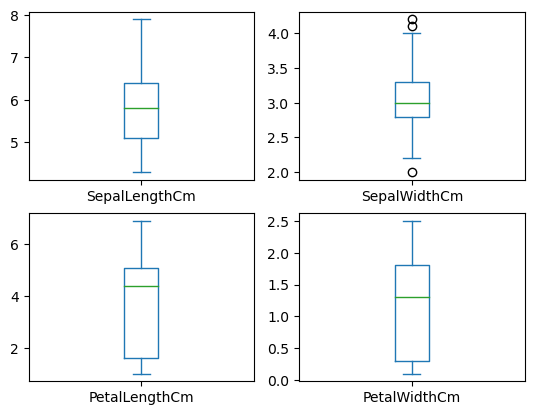

In [54]:
dataset_drop_id.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False) # this shows the mean of features/columns
plt.show()

In [44]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,75.899329,5.844295,3.044966,3.773826,1.204027
std,43.314804,0.830775,0.420655,1.760543,0.762896
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,39.000000,5.100000,2.800000,1.600000,0.300000
50%,76.000000,5.800000,3.000000,4.400000,1.300000
75%,113.000000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.200000,6.900000,2.500000


In [5]:
dataset.isnull().sum() # This checks for null value, the  data is clean

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### checking the number of rows and columns

In [6]:
dataset.shape

(149, 6)

In [7]:
dataset.Species.values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       '

### converting labels from string to numeric which is  machine readadble form

In [8]:
label_encode = LabelEncoder()

In [9]:
labels = label_encode.fit_transform(dataset.Species)

### Iris-setosa         ---->  0
### Iris-versicolor   ---->  1
### Iris-virginica      ---->  2

In [10]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
dataset['Target']=labels #This adds a new column targets that have been numerically encoded

In [12]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica,2
145,147,6.3,2.5,5.0,1.9,Iris-virginica,2
146,148,6.5,3.0,5.2,2.0,Iris-virginica,2
147,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [13]:
X=dataset.drop(columns=['Id','Species','Target'],axis=1) #dropped features not needed for X
Y = dataset['Target'] # the target column

### The model is splitted for training and testing and 25% is apportioned for testing 

In [14]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,stratify=Y,test_size=0.25,random_state=3)

##### Instatitate the model for prediction

In [15]:
model= LogisticRegression()

#### Training the model

In [16]:
model.fit(X_train,Y_train)

LogisticRegression()

#### Predicting outcome

In [17]:
X_predict =model.predict(X_train)

#### measuring the accuracy score

In [18]:
accuracy_of_x = accuracy_score(X_predict,Y_train)

In [19]:
accuracy_of_x

0.9819819819819819

#### Predicting X_test variable

In [20]:
predict_test =model.predict(X_test)

In [21]:
accuracy_of_X_test = accuracy_score(predict_test,Y_test)

In [22]:
accuracy_of_X_test

0.9210526315789473

### Making a predictive system

In [23]:
# (16,5.7,4.4,1.5,0.4)

In [24]:
input_data =(5.7,4.4,1.5,0.4)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The specie is Iris-sesota')
elif(prediction[0]==1):
    
  print('The specie is iris-versicolor')
else:
    print('The specie is iris-virginica')

[0]
The specie is Iris-sesota


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
